In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
# import pandas as pd
# import scipy.stats as stats
# import matplotlib as mpl
# from matplotlib import cm
# from matplotlib import rc as matplotlibrc
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.ticker import  MultipleLocator
# matplotlibrc('text',   usetex=True)
# matplotlibrc('font',family='serif')

In [2]:
# Known constants
gamma = 1.4
gm1 = gamma - 1
gp1 = gamma + 1
R = 287 # J/(kg*K)

# Given variables
T1 = 300 # K
T4 = 300 # K
P1 = 100 # kPa
P4 = P1 * 5 # P4/P1 = 5

In [3]:
a1 = np.sqrt(gamma * R * T1)
a4 = np.sqrt(gamma * R * T4)

P2_P1 = 2.12787 # from WolframAlpha
P2 = P1 * P2_P1

numerator = gp1/gm1 + P2_P1
denominator = 1 + gp1*P2_P1/gm1
T2 = T1 * P2_P1 * numerator/denominator # K

P3_P4 = P2_P1/(P4/P1) # P3/P4 = P2/P4
P3 = P4 * P3_P4 # kPa

T3 = T4 * P3_P4**(gm1/gamma) # K

W = a1*np.sqrt(gp1/2/gamma*(P2_P1 - 1) + 1) # m/s
up = a1/gamma * (P2_P1 - 1) * np.sqrt(2*gamma/(P2_P1*gp1 + gm1)) # m/s
U1 = 0
u2 = up

a3 = np.sqrt(gamma * R * T3) # m/s

rho1 = P1/(R*T1)
rho2 = rho1 * ((1 + gp1*P2/(gm1*P1))/(gp1/gm1 + P2/P1))
rho4 = P4/(R*T4)
rho3 = (P3/P4)**(1/gamma) * rho4

u1 = 0
u3 = u2
u4 = 0

In [4]:
def pressure_plot(t, diaphragm):
    points = 500
    
    x_arr = np.zeros((points,))
    P_arr = np.zeros((points,))
    
    xhd = diaphragm - a1 * t # head of rarefaction
    xft = diaphragm + (up - a3) * t # foot of rarefaction
    xcd = diaphragm + up * t # contact discontinuity
    xsh = diaphragm + W * t # shock wave
    
    for i in range(points):
        x_arr[i] = i
        
        if i < xhd:
            P_arr[i] = P4
        elif i < xft:
            u = 2 / gp1 * (a4 + (x_arr[i] - diaphragm) / t)
            fact = 1 - 0.5 * gm1 * u / a4
            P_arr[i] = P4 * fact ** (2 * gamma / gm1)
        elif i < xcd:
            P_arr[i] = P3
        elif i < xsh:
            P_arr[i] = P2
        else:
            P_arr[i] = P1

    plt.plot(x_arr, P_arr, color='navy')
    plt.axvline(x = xhd, color = 'red', linestyle='dashed', label='Head of Rarefaction')
    plt.axvline(x = xft, color = 'orange', linestyle='dashed', label='Foot of Rarefaction')
    plt.axvline(x = xcd, color = 'gold', linestyle='dashed', label='Contact Discontinuity')
    plt.axvline(x = xsh, color = 'g', linestyle='dashed', label='Shock Wave')
    plt.legend()
    plt.ylabel('Pressure (kPa)')
    plt.xlabel('Distance (m)')
    plt.title(f'Pressure Across Shock Tube at t = {t}s')
    plt.grid()
    plt.show()

    pass

In [5]:
def pressure(t_0, t_f, plots):
    dt = (t_f - t_0)/(plots - 1)
    diaphragm = 200
    
    for i in range(plots):
        P_arr = pressure_plot(t_0 + dt * i, diaphragm)
    
    pass

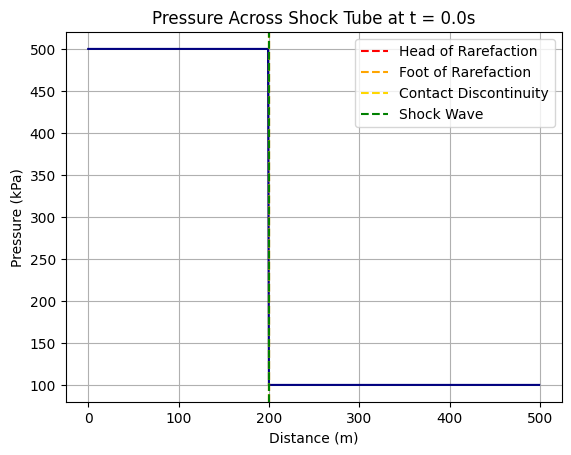

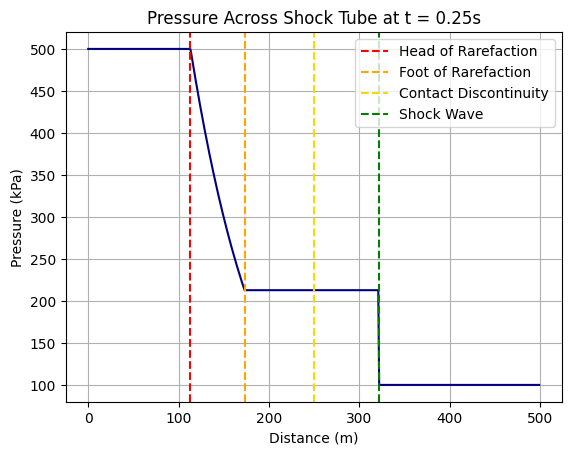

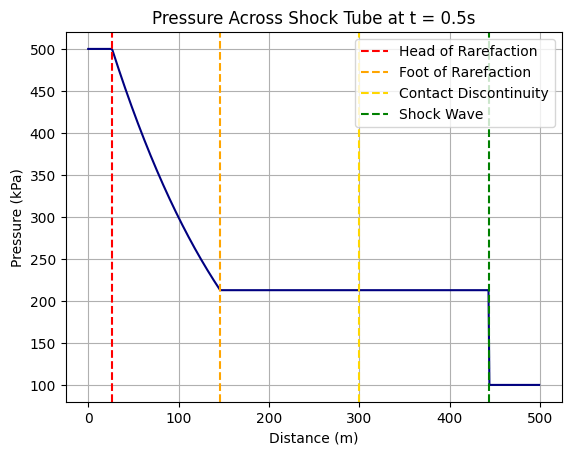

In [6]:
pressure(0, 0.5, 3)

In [7]:
def all_values(t, diaphragm):
    points = 500
    
    x_arr = np.zeros((points,))
    P_before = np.zeros((points,))
    P_arr = np.zeros((points,))
    rho_arr = np.zeros((points,))
    T_arr = np.zeros((points,))
    u_arr = np.zeros((points,))
    
    xhd = diaphragm - a1 * t # head of rarefaction
    xft = diaphragm + (up - a3) * t # foot of rarefaction
    xcd = diaphragm + up * t # contact discontinuity
    xsh = diaphragm + W * t # shock wave
    
    for i in range(points):
        x_arr[i] = i
        
        # Pressure at t=0s
        if i < diaphragm:
            P_before[i] = P4
        else:
            P_before[i] = P1
        
        # Pressure
        if i < xhd:
            P_arr[i] = P4
        elif i < xft:
            u = 2 / gp1 * (a4 + (x_arr[i] - diaphragm) / t)
            fact = 1 - 0.5 * gm1 * u / a4
            P_arr[i] = P4 * fact ** (2 * gamma / gm1)
        elif i < xcd:
            P_arr[i] = P3
        elif i < xsh:
            P_arr[i] = P2
        else:
            P_arr[i] = P1
        
        # Density
        if i < xhd:
            rho_arr[i] = rho4
        elif i < xft:
            rho_arr[i] = rho4 * (P_arr[i]/P4)**(1/gamma)
        elif i < xcd:
            rho_arr[i] = rho3
        elif i < xsh:
            rho_arr[i] = rho2
        else:
            rho_arr[i] = rho1
        
        # Temperature
        if i < xhd:
            T_arr[i] = T4
        elif i < xft:
            T_arr[i] = P_arr[i]/(R*rho_arr[i])
        elif i < xcd:
            T_arr[i] = T3
        elif i < xsh:
            T_arr[i] = T2
        else:
            T_arr[i] = T1
        
        # Velocity
        if i < xhd:
            u_arr[i] = u4
        elif i < xft:
            u_arr[i] = 2/gp1 * (a4 + (x_arr[i] - diaphragm)/t)
        elif i < xcd:
            u_arr[i] = u3
        elif i < xsh:
            u_arr[i] = u2
        else:
            u_arr[i] = u1

    return x_arr, P_arr, rho_arr, T_arr, u_arr

In [8]:
def single_particle(x0, u0, D, rho, t0, tf, steps, temp0, diaphragm):
    M = 1/6 * np.pi * D**3 * rho # particle mass = volume * density
    A = np.pi/4 * D**2 # projected area
    mu = 2e-5 # kg/ms, dynamic viscosity
    Pr = 0.72 # Prandtl number
    k_g = 0.025 # W/m*K, thermal conductivity of air
    c_p = 860 # J/(kg*K), specific heat capacity
    
    dt = (tf - t0)/(steps - 1) # time step
    
    Fd_arr = np.zeros((steps,))
    t_arr = np.zeros((steps,))
    up_arr = np.zeros((steps,))
    xp_arr = np.zeros((steps,))
    Tp_arr = np.zeros((steps,))
    
    up_arr[0] = u0
    xp_arr[0] = x0
    Tp_arr[0] = temp0
    
    for i in range(steps):
        t_arr[i] = t0 + i * dt
        
        x_arr, P_arr, rho_arr, T_arr, u_arr = all_values(t0 + i * dt, diaphragm)
        
        Re = rho_arr[int(xp_arr[i])] * abs(u_arr[int(xp_arr[i])] - int(up_arr[i])) * D / mu # Reynolds number
        Nu = 0.459 * Pr**0.33 * Re**0.55 # Nusselt number
        Q_qs = np.pi * D * k_g * (T_arr[int(xp_arr[i])] - int(Tp_arr[i])) * Nu # quasi steady state heat convection
        
        if Re == 0: 
            Cd = 0.42
        else:
            Cd = 24/Re + 4.4/np.sqrt(Re) + 0.42 # drag coefficient
            
        Fd_arr[i] = Cd * rho_arr[int(xp_arr[i])] * A * (u_arr[int(xp_arr[i])] - int(up_arr[i]))**2 / 2 # drag force
        
        if i != steps - 1:
            up_arr[i + 1] = up_arr[i] + Fd_arr[i]/M * dt
            xp_arr[i + 1] = xp_arr[i] + up_arr[i] * dt
            Tp_arr[i + 1] = Tp_arr[i] + Q_qs/(M * c_p) * dt
        
    return t_arr, up_arr, xp_arr, Fd_arr, Tp_arr

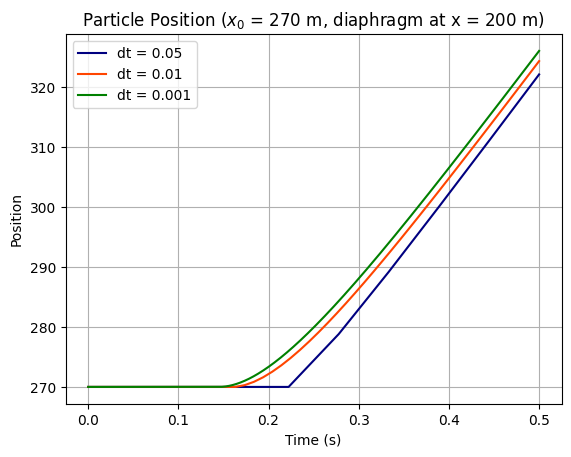

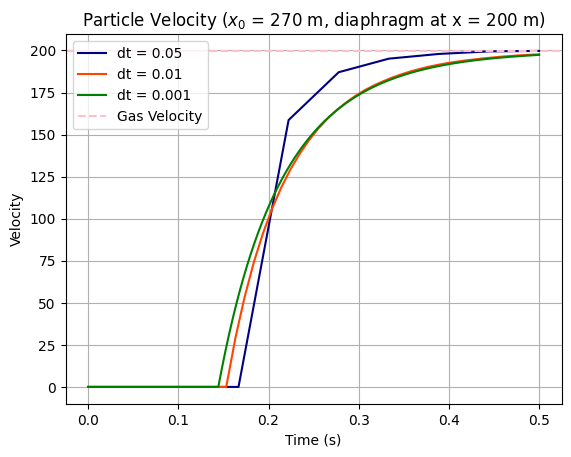

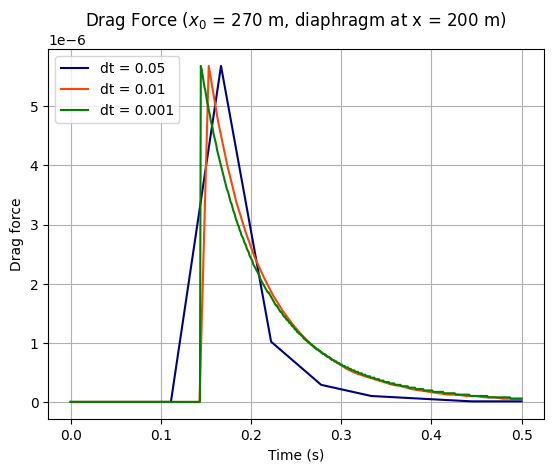

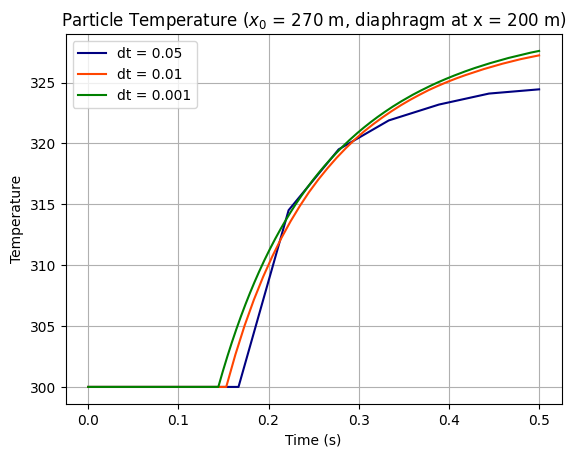

In [9]:
x_p0 = 270 #m, initial particle location
u_p0 = 0 # initial particle velocity
rho_p = 2500 # kg/m^3, particle density
d_p = 115e-6 # m, particle diameter

temp_0 = T1 # 300 K, initial particle temperature

t_0 = 0 # s, initial time
t_f = 0.5 # s, final time

# number of steps
steps_1 = 10
steps_2 = 50
steps_3 = 500

diaphragm = 200 # x value of diaphragm

t_arr, up_arr, xp_arr, Fd_arr, Tp_arr = single_particle(x_p0, u_p0, d_p, rho_p, t_0, t_f, steps_1, temp_0, diaphragm)
t_arr_2, up_arr_2, xp_arr_2, Fd_arr_2, Tp_arr_2 = single_particle(x_p0, u_p0, d_p, rho_p, t_0, t_f, steps_2, temp_0, diaphragm)
t_arr_3, up_arr_3, xp_arr_3, Fd_arr_3, Tp_arr_3 = single_particle(x_p0, u_p0, d_p, rho_p, t_0, t_f, steps_3, temp_0, diaphragm)

plt.plot(t_arr, xp_arr, color='navy', label=f'dt = {(t_f - t_0)/steps_1}')
plt.plot(t_arr_2, xp_arr_2, color='orangered', label=f'dt = {(t_f - t_0)/steps_2}')
plt.plot(t_arr_3, xp_arr_3, color='g', label=f'dt = {(t_f - t_0)/steps_3}')
plt.legend(loc=2)
plt.ylabel('Position')
plt.xlabel('Time (s)')
plt.title(f'Particle Position ($x_0$ = {x_p0} m, diaphragm at x = {diaphragm} m)')
plt.grid()
plt.show()

plt.plot(t_arr, up_arr, color='navy', label=f'dt = {(t_f - t_0)/steps_1}')
plt.plot(t_arr_2, up_arr_2, color='orangered', label=f'dt = {(t_f - t_0)/steps_2}')
plt.plot(t_arr_3, up_arr_3, color='g', label=f'dt = {(t_f - t_0)/steps_3}')
plt.axhline(y = u3, color='pink', linestyle = '--', label='Gas Velocity')
plt.legend(loc=2)
plt.ylabel('Velocity')
plt.xlabel('Time (s)')
plt.title(f'Particle Velocity ($x_0$ = {x_p0} m, diaphragm at x = {diaphragm} m)')
plt.grid()
plt.show()

plt.plot(t_arr, Fd_arr, color='navy', label=f'dt = {(t_f - t_0)/steps_1}')
plt.plot(t_arr_2, Fd_arr_2, color='orangered', label=f'dt = {(t_f - t_0)/steps_2}')
plt.plot(t_arr_3, Fd_arr_3, color='g', label=f'dt = {(t_f - t_0)/steps_3}')
plt.legend(loc=2)
plt.ylabel('Drag force')
plt.xlabel('Time (s)')
plt.title(f'Drag Force ($x_0$ = {x_p0} m, diaphragm at x = {diaphragm} m)')
plt.grid()
plt.show()

plt.plot(t_arr, Tp_arr, color='navy', label=f'dt = {(t_f - t_0)/steps_1}')
plt.plot(t_arr_2, Tp_arr_2, color='orangered', label=f'dt = {(t_f - t_0)/steps_2}')
plt.plot(t_arr_3, Tp_arr_3, color='g', label=f'dt = {(t_f - t_0)/steps_3}')
# plt.axhline(y = T2, color='pink', linestyle = '--', label='Gas Temperature')
plt.legend(loc=2)
plt.ylabel('Temperature')
plt.xlabel('Time (s)')
plt.title(f'Particle Temperature ($x_0$ = {x_p0} m, diaphragm at x = {diaphragm} m)')
plt.grid()
plt.show()

In [10]:
t_arr

array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ])

In [11]:
xp_arr

array([270.        , 270.        , 270.        , 270.        ,
       270.        , 278.81295796, 289.2049866 , 300.04503469,
       311.04072481, 322.12111695])

In [12]:
up_arr

array([  0.        ,   0.        ,   0.        ,   0.        ,
       158.63324321, 187.05651555, 195.1208656 , 197.92242224,
       199.44705847, 199.71958479])

In [13]:
Fd_arr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.68458625e-06,
       1.01854151e-06, 2.88984153e-07, 1.00393146e-07, 5.46349932e-08,
       9.76591852e-09, 9.76591852e-09])